# Experimenting with different chunk sizes

In [1]:
from rolling.pdf import list_pdfs, read_pdf
pdfs = list_pdfs()
len(pdfs), pdfs[:3]

(1020,
 ['./arxiv_downloads\\0808.2870v1.Measuring_Distance_and_Properties_of_the_Milky_Way_s_Central_Supermassive_Black_Hole_with_Stellar_Orbits.pdf',
  './arxiv_downloads\\0809.4677v1.Approaching_the_event_horizon__1_3mm_VLBI_of_SgrA_.pdf',
  './arxiv_downloads\\0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pdf'])

In [2]:
paper = read_pdf(pdfs[0])
len(paper.split(' '))

46652

In [3]:
from rolling.embedding import GTEEmbeddingModel
model = GTEEmbeddingModel()
model.max_size

8192

In [4]:
# see how adding a word changes the embedding
words = paper.split(' ')
sentences = []
text = ""
for word in words:
    text += word + " "
    sentences.append(text.strip())

len(sentences), sentences[:5]

(9543,
 ['arXiv:0812.0743v2',
  'arXiv:0812.0743v2 [cs.LG]',
  'arXiv:0812.0743v2 [cs.LG] 10',
  'arXiv:0812.0743v2 [cs.LG] 10 Oct',
  'arXiv:0812.0743v2 [cs.LG] 10 Oct 2009'])

In [5]:
embeddings = model.encode(sentences, batch_size=1, progressbar=True)

100%|██████████| 9543/9543 [06:37<00:00, 24.01it/s] 


In [ ]:
from rolling.embedding import get_similarity

changes = []
for txt_from in range(1, len(embeddings)):
    emb1 = embeddings[txt_from-1]
    emb2 = embeddings[txt_from]
    change = 1 - get_similarity(emb1, emb2)
    changes.append(change)

len(changes), changes[:5]

(9542,
 [np.float16(0.08936),
  np.float16(0.004395),
  np.float16(0.007324),
  np.float16(0.03418),
  np.float16(0.004883)])

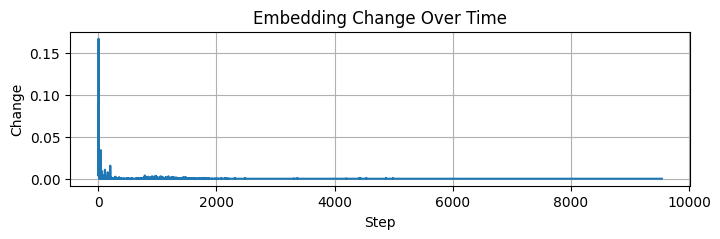

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
# plt.xlim(0.6, 1.0)
plt.plot(changes)
plt.title("Embedding Change Over Time")
plt.xlabel("Step")
plt.ylabel("Change")
plt.grid(True)
plt.show()

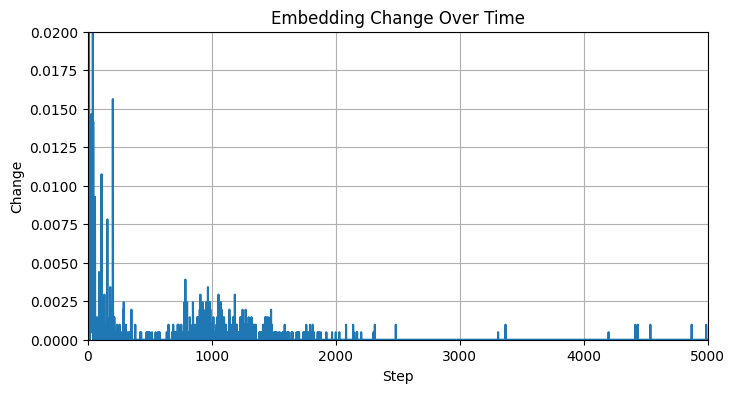

In [19]:
plt.figure(figsize=(8, 4))
plt.ylim(0, 0.02)
plt.xlim(0, 5000)
plt.plot(changes)
plt.title("Embedding Change Over Time")
plt.xlabel("Step")
plt.ylabel("Change")
plt.grid(True)
plt.show()

---

In [4]:
import os
download_dir = './arxiv_downloads'
if not os.path.exists(download_dir):
    os.mkdir(download_dir)

In [29]:
import arxiv

def download_if_new(result:arxiv.Result):
    filename = result._get_default_filename()
    filepath = os.path.join(download_dir, filename)
    if os.path.exists(filepath):
        print(f'Skipping {result.entry_id}')
        return
    
    try:
        result.download_pdf(dirpath=download_dir)
        print(f'Downloaded {result.entry_id}')
    except Exception as e:
        print(f"Error downloading {filename}: {e}")
        return None
    return filepath

In [5]:
papers_cow = (
    '2105.09782', '1811.09918', '2106.03643', '1005.1381', '2203.09606', '2101.10445', '2307.13994', '2405.15550', '2110.07103', '2407.20372'
)
papers_blackhole = (
    '1511.08596', 'astro-ph/0611950', '0808.2870', '0906.1492', '1302.5116', 'astro-ph/9809222', 'astro-ph/0003433', '0906.5351', '0809.4677', '1805.05051'
)

In [39]:
client = arxiv.Client()

for result in client.results(arxiv.Search(id_list=papers_cow)):
    download_if_new(result)
for result in client.results(arxiv.Search(id_list=papers_blackhole)):
    download_if_new(result)

Downloaded http://arxiv.org/abs/2105.09782v2
Downloaded http://arxiv.org/abs/1811.09918v1
Downloaded http://arxiv.org/abs/2106.03643v1
Downloaded http://arxiv.org/abs/1005.1381v2
Downloaded http://arxiv.org/abs/2203.09606v1
Downloaded http://arxiv.org/abs/2101.10445v1
Downloaded http://arxiv.org/abs/2307.13994v1
Downloaded http://arxiv.org/abs/2405.15550v1
Downloaded http://arxiv.org/abs/2110.07103v1
Downloaded http://arxiv.org/abs/2407.20372v1
Downloaded http://arxiv.org/abs/1511.08596v1
Downloaded http://arxiv.org/abs/astro-ph/0611950v2
Downloaded http://arxiv.org/abs/0808.2870v1
Downloaded http://arxiv.org/abs/0906.1492v2
Downloaded http://arxiv.org/abs/1302.5116v1
Downloaded http://arxiv.org/abs/astro-ph/9809222v1
Downloaded http://arxiv.org/abs/astro-ph/0003433v1
Downloaded http://arxiv.org/abs/0906.5351v1
Downloaded http://arxiv.org/abs/0809.4677v1
Downloaded http://arxiv.org/abs/1805.05051v3


In [6]:
from rolling.pdf import list_pdfs, read_pdf
pdfs = list_pdfs()

paths_cow = [
    path
    for id in papers_cow
    for path in pdfs
    if id in path
]
assert len(paths_cow) == len(papers_cow), f'{len(paths_cow)} != {len(papers_cow)}'

paths_blackhole = [
    path
    for id in papers_blackhole
    for path in pdfs
    if id.replace('/', '_') in path
]
assert len(paths_blackhole) == len(papers_blackhole), f'{len(paths_blackhole)} != {len(papers_blackhole)}'

In [7]:
papers_cow = [read_pdf(path) for path in paths_cow]
papers_blackhole = [read_pdf(path) for path in paths_blackhole]

Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 29 0 (offset 0)
Ignoring wrong pointing object 31 0 (offset 0)
Ignoring wrong pointing object 33 0 (offset 0)
Ignoring wrong pointing object 43 0 (offset 0)
Ignoring wrong pointing object 71 0 (offset 0)
Ignoring wrong pointing object 81 0 (offset 0)
Ignoring wrong pointing object 95 0 (offset 0)


---
# Visualize how different sized chunk embeddings start to lose meaning

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from rolling.pdf import chunk_text

embeddings_cow = np.array([
    np.mean(model.encode(chunk_text(paper, size=1024)), axis=0)
    for paper in papers_cow
])
embeddings_blackhole = np.array([
    np.mean(model.encode(chunk_text(paper, size=1024)), axis=0)
    for paper in papers_blackhole
])
embeddings_cow.shape

(10, 768)

In [21]:
all_embeddings = np.vstack([embeddings_cow, embeddings_blackhole])
reducer = PCA(n_components=2)
embedding_2d = reducer.fit_transform(all_embeddings)

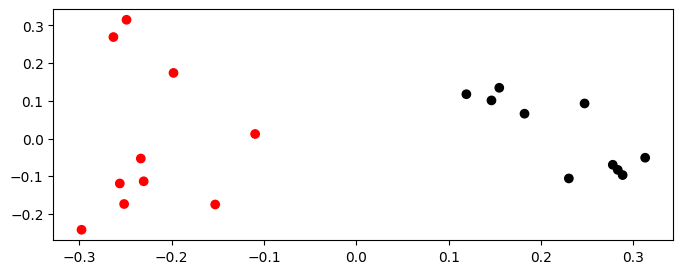

In [22]:
colors = ['red'] * 10 + ['black'] * 10  # cow is red
plt.figure(figsize=(8,3))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=colors)
plt.show()

In [9]:
import os
plot_export_dir = 'plot_exports'
os.makedirs(plot_export_dir, exist_ok=True)

Plotting chunk size 8192: 119 vs. 144


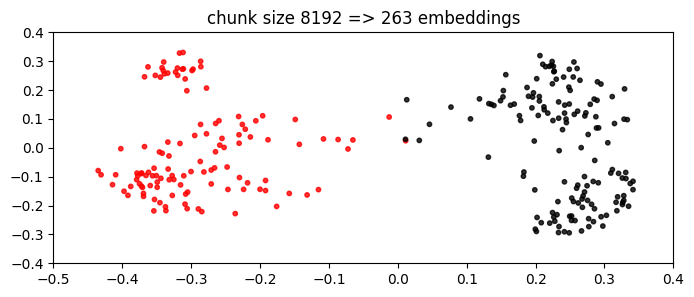

In [10]:

def chunk_and_plot(chunk_size:int, alpha, size, save_path=None, figsize=(8,4)):
    batch_size = min(32768 // chunk_size + 1, 1024)
    embeddings_cow = np.vstack([
        model.encode(chunk_text(paper, size=chunk_size), batch_size=batch_size)
        for paper in papers_cow
    ])
    embeddings_blackhole = np.vstack([
        model.encode(chunk_text(paper, size=chunk_size), batch_size=batch_size)
        for paper in papers_blackhole
    ])
    all_embeddings = np.vstack([embeddings_cow, embeddings_blackhole])

    reducer = PCA(n_components=2, random_state=42)
    embedding_2d = reducer.fit_transform(all_embeddings)
    
    print(f'Plotting chunk size {chunk_size}: {len(embeddings_cow)} vs. {len(embeddings_blackhole)}')

    colors = ['red'] * len(embeddings_cow) + ['black'] * len(embeddings_blackhole)  # cow is red

    def _prep_plot():
        plt.figure(figsize=figsize)
        plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=colors, alpha=alpha, s=size)
        plt.title(f'chunk size {chunk_size} => {len(all_embeddings)} embeddings')
        plt.xlim(-0.5, 0.4)
        plt.ylim(-0.4, 0.4)


    if save_path:
        # Hack: save multiple variants in different orientations because PCA might swap it
        # no easy way to guarantee it stays the same? have to hand select...

        _prep_plot()
        plt.savefig(save_path.replace('.png', '-v1.png'), dpi=300, bbox_inches='tight')
        plt.close()
        
        embedding_2d[:, 0] *= -1
        _prep_plot()
        plt.savefig(save_path.replace('.png', '-v2.png'), dpi=300, bbox_inches='tight')
        plt.close()
        
        embedding_2d[:, 1] *= -1
        _prep_plot()
        plt.savefig(save_path.replace('.png', '-v3.png'), dpi=300, bbox_inches='tight')
        plt.close()
        
        embedding_2d[:, 0] *= -1
        _prep_plot()
        plt.savefig(save_path.replace('.png', '-v4.png'), dpi=300, bbox_inches='tight')
        plt.close()
    else:
        _prep_plot()
        plt.show()
    

chunk_and_plot(8192, alpha=0.8, size=10, figsize=(8, 3))
# chunk_and_plot(4096, alpha=0.3, size=2, save_path=os.path.join(plot_export_dir, f'{1:03}.png'))
# chunk_and_plot(2048, alpha=0.3, size=2)
# chunk_and_plot(64 , alpha=0.08, size=1.3)
# chunk_and_plot(32, alpha=0.02,  size=1.0)
# chunk_and_plot(4 , alpha=0.005, size=1.5)

[8191 8050 7912 7776 7642 7510 7381 7254 7129 7006 6886 6767 6651 6536
 6424 6313 6204 6097 5992 5889 5788 5688 5590 5494 5400 5307 5215 5125
 5037 4950 4865 4781 4699 4618 4539 4461 4384 4308 4234 4161 4090 4019
 3950 3882 3815 3749 3685 3621 3559 3498 3438 3378 3320 3263 3207 3152
 3097 3044 2992 2940 2890 2840 2791 2743 2696 2649 2604 2559 2515 2471
 2429 2387 2346 2306 2266 2227 2188 2151 2114 2077 2042 2006 1972 1938
 1905 1872 1840 1808 1777 1746 1716 1687 1657 1629 1601 1573 1546 1520
 1493 1468 1442 1418 1393 1369 1346 1322 1300 1277 1255 1234 1212 1192
 1171 1151 1131 1112 1092 1074 1055 1037 1019 1002  984  967  951  934
  918  902  887  872  857  842  827  813  799  785  772  758  745  733
  720  708  695  683  672  660  649  637  626  616  605  595  584  574
  564  555  545  536  527  517  509  500  491  483  474  466  458  450
  443  435  427  420  413  406  399  392  385  378  372  365  359  353
  347  341  335  329  324  318  313  307  302  297  292  287  282  277
  272 

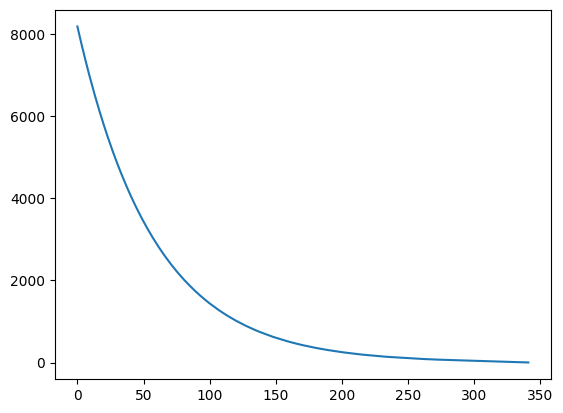

In [11]:
chunk_sizes = np.logspace(np.log10(8192), np.log10(2), 480, dtype=np.int32)
chunk_sizes = np.sort(np.unique(chunk_sizes))[::-1]
print(chunk_sizes)
plt.plot(chunk_sizes)

In [ ]:
N = len(chunk_sizes)
for i, c, a, s in zip(
    range(N,),
    chunk_sizes,
    np.logspace(np.log10(1), np.log10(0.008), N),
    np.logspace(np.log10(10), np.log10(1.5), N),
):
    path = os.path.join(plot_export_dir, f'{c:04d}.png')
    chunk_and_plot(chunk_size=c, alpha=a, size=s, figsize=(8, 3), save_path=path)

Plotting chunk size 272: 3484 vs. 4242
Plotting chunk size 267: 3567 vs. 4336
Plotting chunk size 263: 3624 vs. 4401
Plotting chunk size 258: 3676 vs. 4473
Plotting chunk size 254: 3739 vs. 4542
Plotting chunk size 249: 3826 vs. 4651
Plotting chunk size 245: 3900 vs. 4733
Plotting chunk size 241: 3957 vs. 4813
Plotting chunk size 237: 4033 vs. 4893
Plotting chunk size 233: 4106 vs. 4978
Plotting chunk size 229: 4175 vs. 5065
Plotting chunk size 225: 4249 vs. 5159
Plotting chunk size 221: 4333 vs. 5252
Plotting chunk size 217: 4412 vs. 5350
Plotting chunk size 213: 4495 vs. 5456
Plotting chunk size 209: 4583 vs. 5559
Plotting chunk size 206: 4625 vs. 5612
Plotting chunk size 202: 4726 vs. 5726
Plotting chunk size 199: 4822 vs. 5841
Plotting chunk size 195: 4921 vs. 5966
Plotting chunk size 192: 4981 vs. 6025
Plotting chunk size 189: 5087 vs. 6155
Plotting chunk size 185: 5197 vs. 6291
Plotting chunk size 182: 5256 vs. 6361
Plotting chunk size 179: 5377 vs. 6507
Plotting chunk size 176: 

In [ ]:
# output_files = os.listdir(plot_export_dir)
# output_files = sorted(output_files, reverse=True)

# for i, file in enumerate(output_files):
#     new_name = f'frame_{i:04d}.png'
#     os.rename(os.path.join(plot_export_dir, file), os.path.join(plot_export_dir, new_name))